<a href="https://colab.research.google.com/github/atalarikajay/Image-Classification/blob/main/Image-Classification-CNN_Muhammad%20Atalarik%20Syach%20Ajay_1101208519_TTX-44-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [278]:
ls

nnmodel_scene/  Tugas11/  Untitled0.ipynb


In [279]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [280]:
print("[INFO] loading images...")
imagePaths = paths.list_images("Tugas11")
data = []
labels = []

[INFO] loading images...


In [281]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x90 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
 
  # preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [282]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [283]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [284]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [285]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(147, 64, 64, 3)


In [286]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D

model = Sequential()
model.add(Convolution2D(16, (5,5), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (5,5), activation='relu'))
model.add(MaxPooling2D(2,2))
# fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 60, 60, 16)        1216      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 26, 26, 32)        12832     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_33 (Dense)             (None, 5)               

In [287]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=85, batch_size=32)

[INFO] training network...
Epoch 1/85
14/14 [==============================] - 2s 148ms/step - loss: 1.6141 - accuracy: 0.2420 - val_loss: 1.5084 - val_accuracy: 0.2993
Epoch 2/85
14/14 [==============================] - 2s 139ms/step - loss: 1.3909 - accuracy: 0.3973 - val_loss: 1.2278 - val_accuracy: 0.4830
Epoch 3/85
14/14 [==============================] - 2s 138ms/step - loss: 1.1656 - accuracy: 0.5046 - val_loss: 1.1485 - val_accuracy: 0.4694
Epoch 4/85
14/14 [==============================] - 2s 140ms/step - loss: 1.0389 - accuracy: 0.5616 - val_loss: 0.9682 - val_accuracy: 0.6190
Epoch 5/85
14/14 [==============================] - 2s 139ms/step - loss: 0.8660 - accuracy: 0.6758 - val_loss: 0.8609 - val_accuracy: 0.6871
Epoch 6/85
14/14 [==============================] - 2s 138ms/step - loss: 0.7780 - accuracy: 0.6872 - val_loss: 0.7988 - val_accuracy: 0.7687
Epoch 7/85
14/14 [==============================] - 2s 138ms/step - loss: 0.6936 - accuracy: 0.7420 - val_loss: 0.7121 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


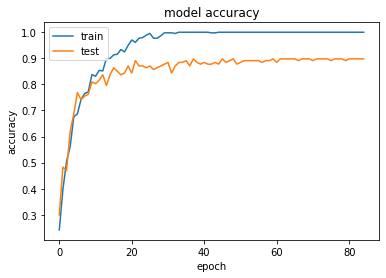

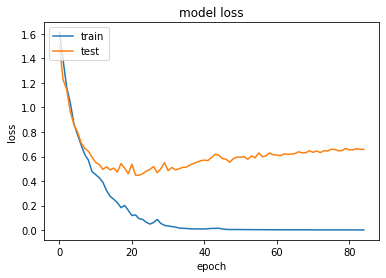

In [288]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [289]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.84      0.91      0.87        23
      GMB_02       0.88      0.81      0.84        26
      GMB_03       0.97      0.91      0.94        34
      GMB_04       0.86      0.89      0.88        28
      GMB_05       0.92      0.94      0.93        36

    accuracy                           0.90       147
   macro avg       0.89      0.89      0.89       147
weighted avg       0.90      0.90      0.90       147



In [290]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [291]:
import cv2
import matplotlib.pyplot as plt
image1='Tugas11/GMB_02/IMG_20200827_201924.jpg'

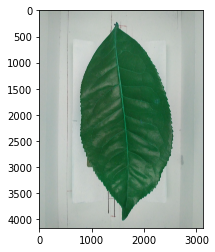

In [292]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [293]:
image_testing = Image.open('Tugas11/GMB_02/IMG_20200827_201924.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [294]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [295]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.5038288e-04 9.9984956e-01 8.1303176e-12 1.8346967e-10 5.0622202e-08]]
['GMB_02']
